In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
def plot_logo(x, y, image, ax, zoom=1):
    '''Help function for plotting logos on ax'''
    image = plt.imread(image)
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

# Stemwijzer
Data van de stemwijzer voor de Tweede Kamer verkiezingen.

Codering:
- `1`: `Eens`
- `0`: `Neutraal`
- `-1`: `Oneens`

In [3]:
zetels = ['vvd', 'pvv', 'cda', 'd66', 'groenlinks', 'sp', 'pvda',
          'cu', 'pvdd', '50plus', 'sgp', 'denk', 'fvd']

stemwijzer = pd.read_csv('data/stemwijzer.csv', index_col=0)

stemwijzer_totaal = stemwijzer.transpose()
partijen_totaal = stemwijzer_totaal.index
len(stemwijzer_totaal)

24

In [4]:
stemwijzer_zetel = stemwijzer[zetels].transpose()
partijen_zetel = stemwijzer_zetel.index
len(stemwijzer_zetel)

13

In [5]:
stemwijzer_nieuw = stemwijzer.drop(zetels, axis=1).transpose()
partijen_nieuw = stemwijzer_nieuw.index
len(stemwijzer_nieuw)

11

## Correlation

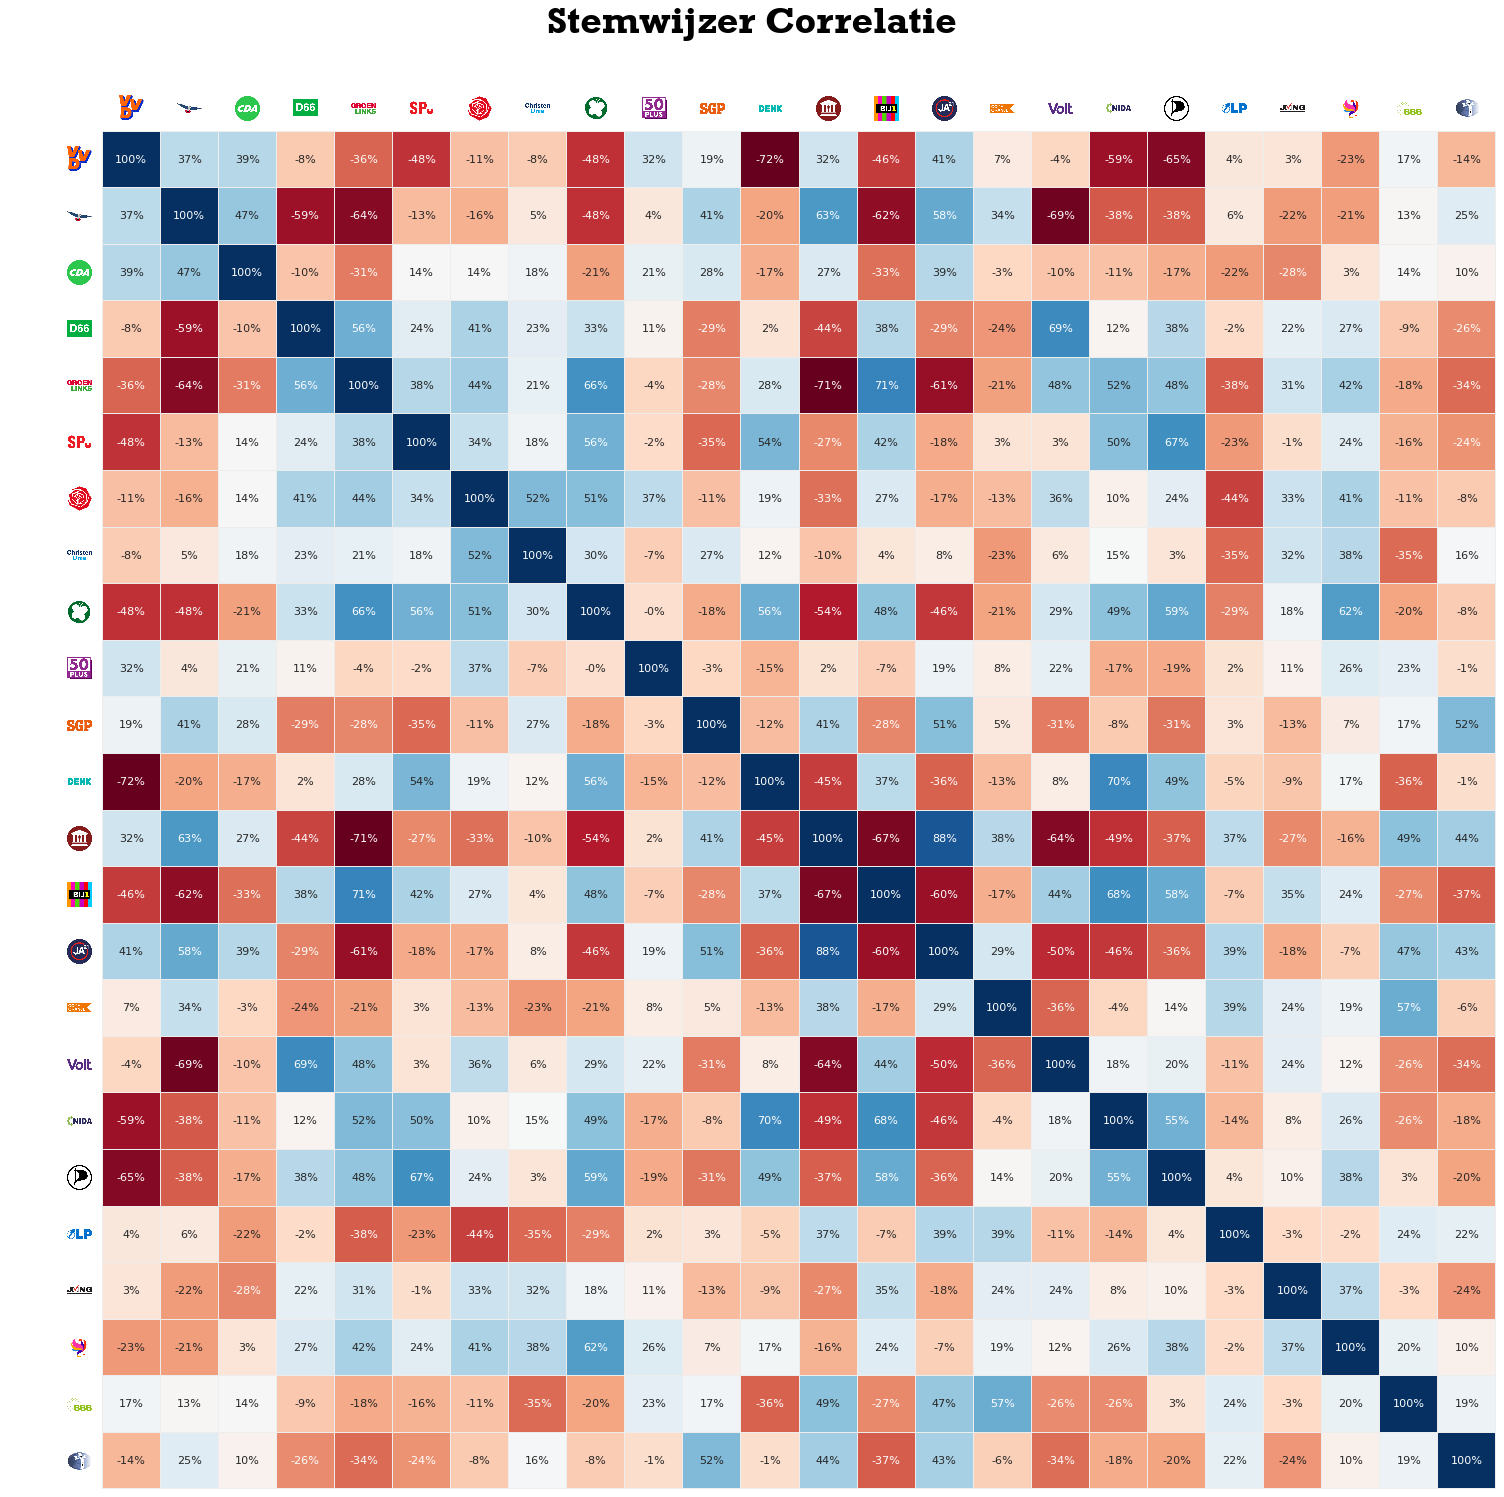

In [6]:
fig, ax = plt.subplots(figsize=(24,24), dpi=80, facecolor='white')

correlation_totaal = stemwijzer_totaal.T.corr()

# Custom annotation
annot = correlation_totaal.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation_totaal, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(partijen_totaal):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.1)
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.1)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=34, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation.png', dpi=300, bbox_inches='tight')

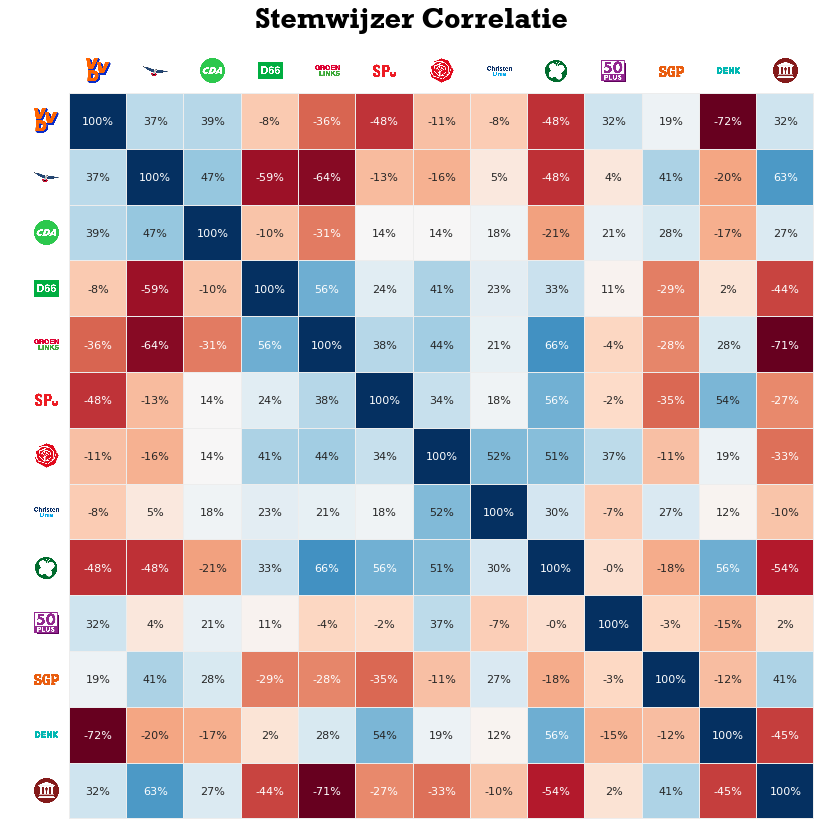

In [7]:
fig, ax = plt.subplots(figsize=(13,13), dpi=80, facecolor='white')

# Correlation between parties
correlation = stemwijzer_zetel.T.corr()

# Custom annotation
annot = correlation.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(partijen_zetel):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.1)
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.1)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=26, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation_current.png', dpi=300, bbox_inches='tight')

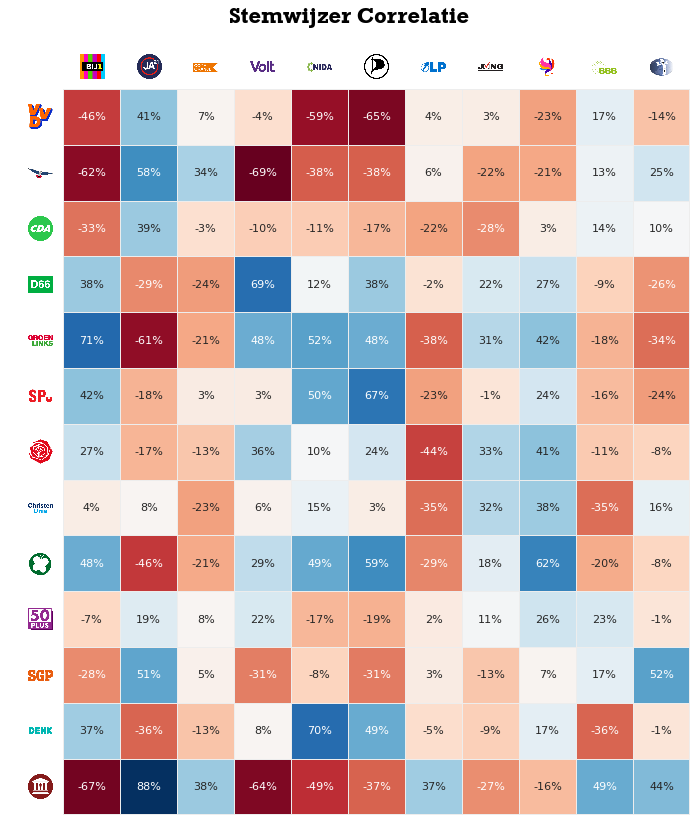

In [8]:
fig, ax = plt.subplots(figsize=(11,13), dpi=80, facecolor='white')

correlation_nieuw = (pd.concat([stemwijzer_zetel.T, stemwijzer_nieuw.T], axis=1,
                                keys=['stemwijzer_zetel', 'stemwijzer_nieuw'])
                     .corr().loc['stemwijzer_zetel', 'stemwijzer_nieuw'])

# Custom annotation
annot = correlation_nieuw.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation_nieuw, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(partijen_nieuw):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.1)
for pos, party in enumerate(partijen_zetel):
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.1)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=20, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation_new.png', dpi=300, bbox_inches='tight')

## Principal Component Analysis

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(stemwijzer_zetel)
print(pca.explained_variance_ratio_)

[0.39272825 0.15469688]


In [10]:
pc_1 = principal_components[:, 0]
pc_2 = -principal_components[:, 1]

x_min, x_max = pc_1.min(), pc_1.max()
y_min, y_max = pc_2.min(), pc_2.max()

In [11]:
pc_features = pd.DataFrame(pca.components_, columns=stemwijzer_zetel.columns, index=['pc1', 'pc2']).transpose()
pc_features

,pc1,pc2
vaccinatiebewijs,0.027193,-0.336649
verhogen defensiebudget,0.208385,-0.206704
gratis kinderopvang,-0.213708,-0.136677
nederland uit eu,0.136707,0.103688
rekeningrijden,-0.166709,-0.119919
vuurwerk toestaan,0.153573,-0.043400
vleesbelasting,-0.118382,-0.209702
bezuinigen publieke omroep,0.139370,0.312489
zorgfonds,-0.176992,0.235068
verbod gezichtsbedekkende kleding,0.149073,-0.001383


In [12]:
features_ordered = pd.DataFrame()
for pc in pc_features.columns:
    features_ordered[pc] = pc_features[pc].sort_values(ascending=False).index
features_ordered

,pc1,pc2
0,vaker gevangenisstaffen ipv taakstraffen,belastingvoordeel huishoudens
1,geen nieuwe beperkingen voor boerenbedrijven,bezuinigen publieke omroep
2,kerncentrale,zorgfonds
3,koppeling minimumloon en bijstand,sociale huurwoningen
4,verhogen defensiebudget,salaris basisschool gelijk aan middelbareschool
5,inburgering op locatie,nederland uit eu
6,vuurwerk toestaan,correctief referendum
7,verbod gezichtsbedekkende kleding,geen nieuwe beperkingen voor boerenbedrijven
8,bezuinigen publieke omroep,excuses slavenhandel
9,nederland uit eu,meer vluchtelingen opnemen


## Political Spectrum (1D)

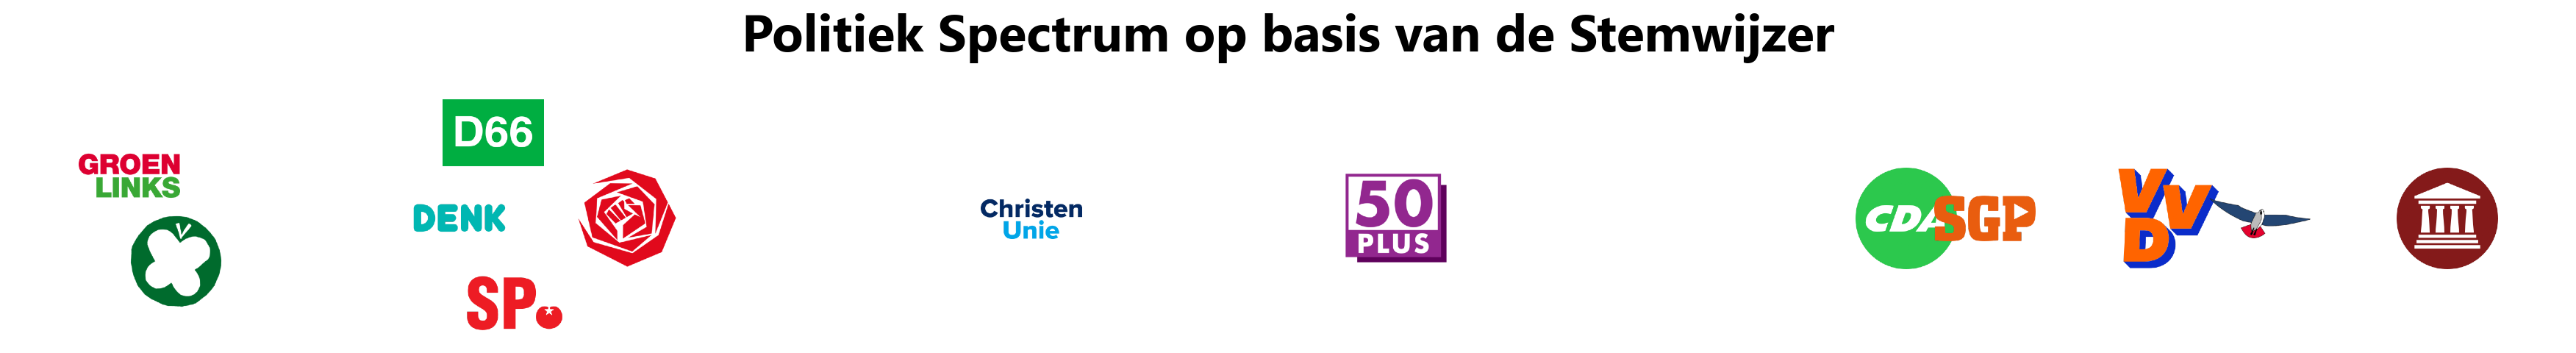

In [13]:
fig, ax = plt.subplots(figsize=(20,2), dpi=180, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

# Plot title
ax.set_title('Politiek Spectrum op basis van de Stemwijzer', pad=40,
             fontsize=28, fontweight='bold', fontname='segoe ui')

# Plot logos
y_pos = [0, 0, 0, 1, .5, -1, 0, 0, -.5, 0, 0, 0, 0, 0]  # y nudges
for x, y, party in zip(pc_1, y_pos, partijen_zetel):
    plot_logo(x, y, f"logos/{party}.png", ax=ax, zoom=.25)

fig.savefig('figures/political_spectrum.png', dpi=300, bbox_inches='tight')

## Political Compass (2D)

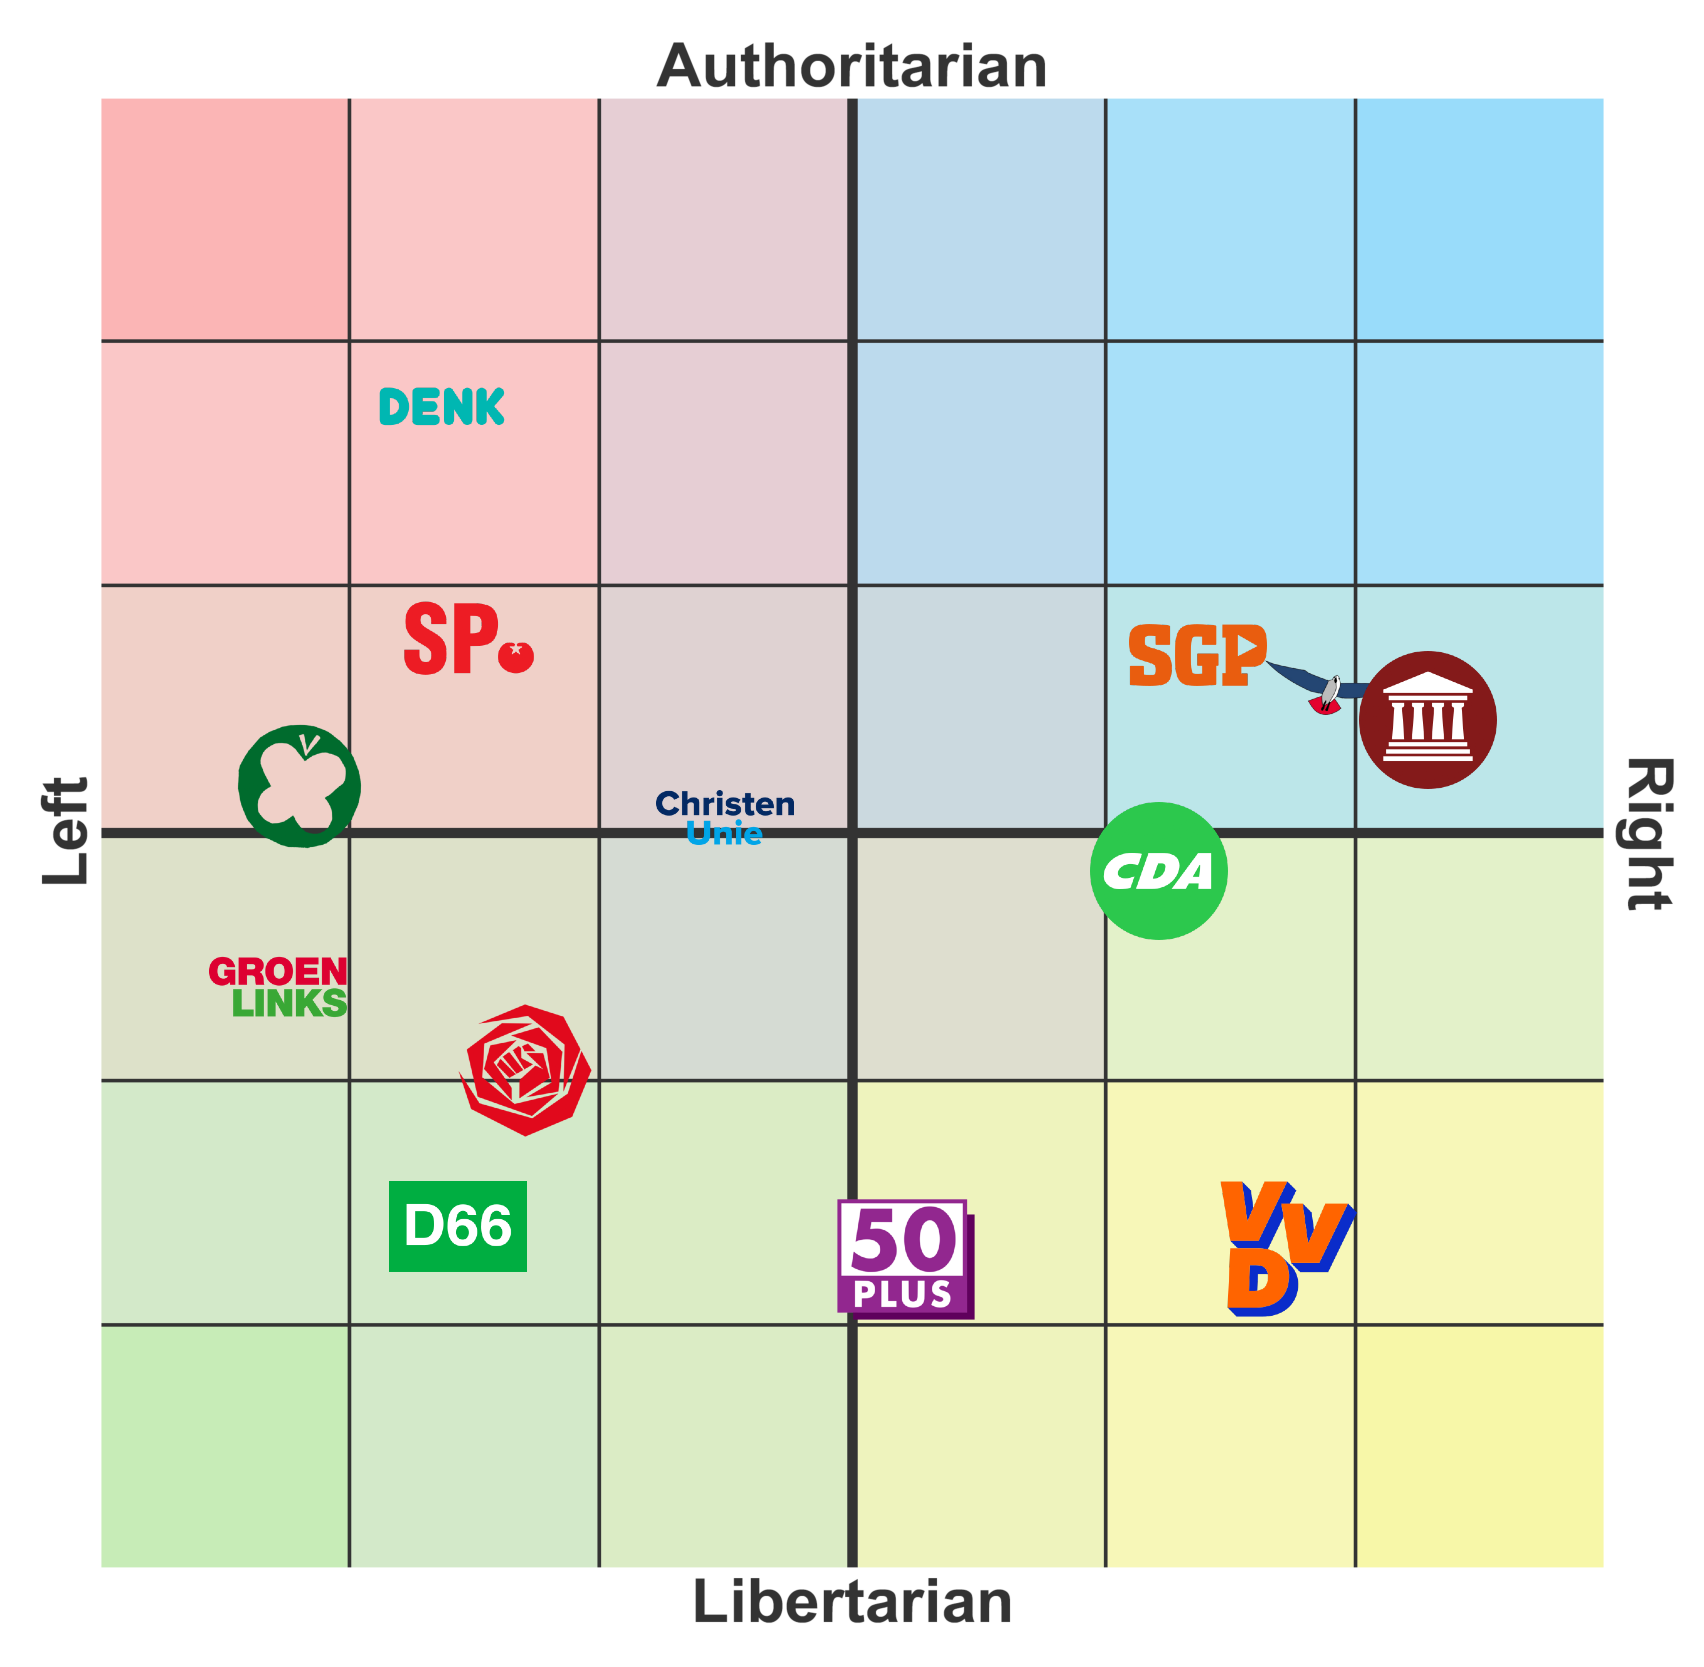

In [15]:
fig, ax = plt.subplots(figsize=(10,10), dpi=180, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

# Plot political compass template
img = plt.imread('logos/political_compass_template.png')
ax.imshow(img, extent=[x_min-2, x_max+2, y_max+3, y_min-3], alpha=.8)

for x, y, party in zip(pc_1, pc_2, partijen_zetel):
    plot_logo(x, y, f"logos/{party}.png", ax=ax, zoom=.25)

fig.savefig('figures/political_compass.png', dpi=300, bbox_inches='tight')